In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sn

import cv2
from random import randint

import numpy as np

dynamicimages9
----> dynamicimages9:	 2 folders, 0 imgs
test
------> test:	 9 folders, 0 imgs
ApplyLipstick
--------> ApplyLipstick:	 0 folders, 20 imgs
BasketballDunk
--------> BasketballDunk:	 0 folders, 20 imgs
BaseballPitch
--------> BaseballPitch:	 0 folders, 20 imgs
ApplyEyeMakeup
--------> ApplyEyeMakeup:	 0 folders, 20 imgs
BalanceBeam
--------> BalanceBeam:	 0 folders, 20 imgs
Archery
--------> Archery:	 0 folders, 20 imgs
BandMarching
--------> BandMarching:	 0 folders, 20 imgs
BabyCrawling
--------> BabyCrawling:	 0 folders, 20 imgs
Basketball
--------> Basketball:	 0 folders, 20 imgs
train
------> train:	 9 folders, 20 imgs
ApplyLipstick
--------> ApplyLipstick:	 0 folders, 94 imgs
BasketballDunk
--------> BasketballDunk:	 0 folders, 111 imgs
BaseballPitch
--------> BaseballPitch:	 0 folders, 130 imgs
ApplyEyeMakeup
--------> ApplyEyeMakeup:	 0 folders, 125 imgs
BalanceBeam
--------> BalanceBeam:	 0 folders, 88 imgs
Archery
--------> Archery:	 0 folders, 125 imgs
BandMarchi

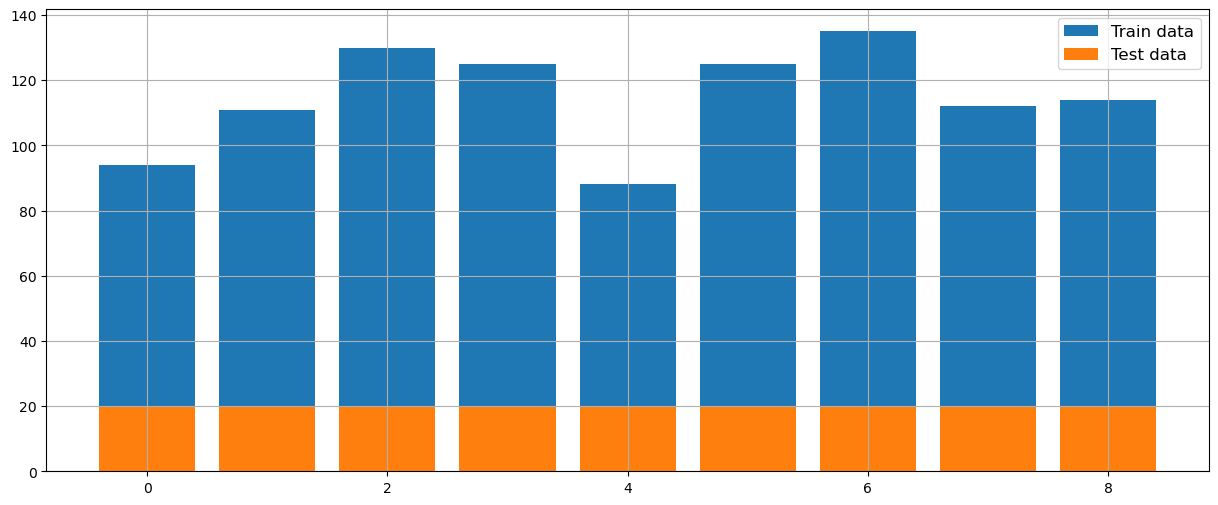

In [3]:
CLASSES, images = [], [] 
for root, dirs, files in os.walk('/kaggle/input/dynamicimages9'):
    f = os.path.basename(root)    
    
    print(f)

    if len(files) > 0:
        images.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) 
   
    
    
    
    count_dirs = 0
    for f in dirs:         
        count_dirs += 1
    depth = root.split(os.sep)
    print((len(depth) - 2) * '--'+'>', '{}:\t {} folders, {} imgs'.format(os.path.basename(root), count_dirs, images[-1] if images!=[] else 0)) 
    
class_count = len(CLASSES) # 9 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(images)))

f, ax = plt.subplots(figsize=(15,6))
if(images[0])<30:
    plt.bar(range(class_count), images[class_count:], label = 'Train data')
    plt.bar(range(class_count), images[0:class_count], label = 'Test data')
else:
    plt.bar(range(class_count), images[0:class_count], label = 'Train data')
    plt.bar(range(class_count), images[class_count:], label = 'Test data')
ax.grid()
ax.legend(fontsize = 12);

In [4]:
print(CLASSES)

['ApplyLipstick', 'BasketballDunk', 'BaseballPitch', 'ApplyEyeMakeup', 'BalanceBeam', 'Archery', 'BandMarching', 'BabyCrawling', 'Basketball']


In [5]:
img_w, img_h = 220, 220    # width and height of image
train_dir = '/kaggle/input/dynamicimages9/train/'

In [6]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name       
        for file in files:
            Labels.append(f)
            try:
                image = cv2.imread(root+'/'+file)              
                image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))       
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an image from BGR color space to RGB
                Images.append(image)
            except Exception as e:
                print(e)
    Images = np.array(Images)
    return (Images, Labels)

In [7]:
def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):   
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels

In [9]:
Train_Imgs, Train_Lbls = read_imgs_lbls(train_dir)
# print(Train_Lbls)
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (1034, 330, 330, 3)
Shape of train labels: (1034,)


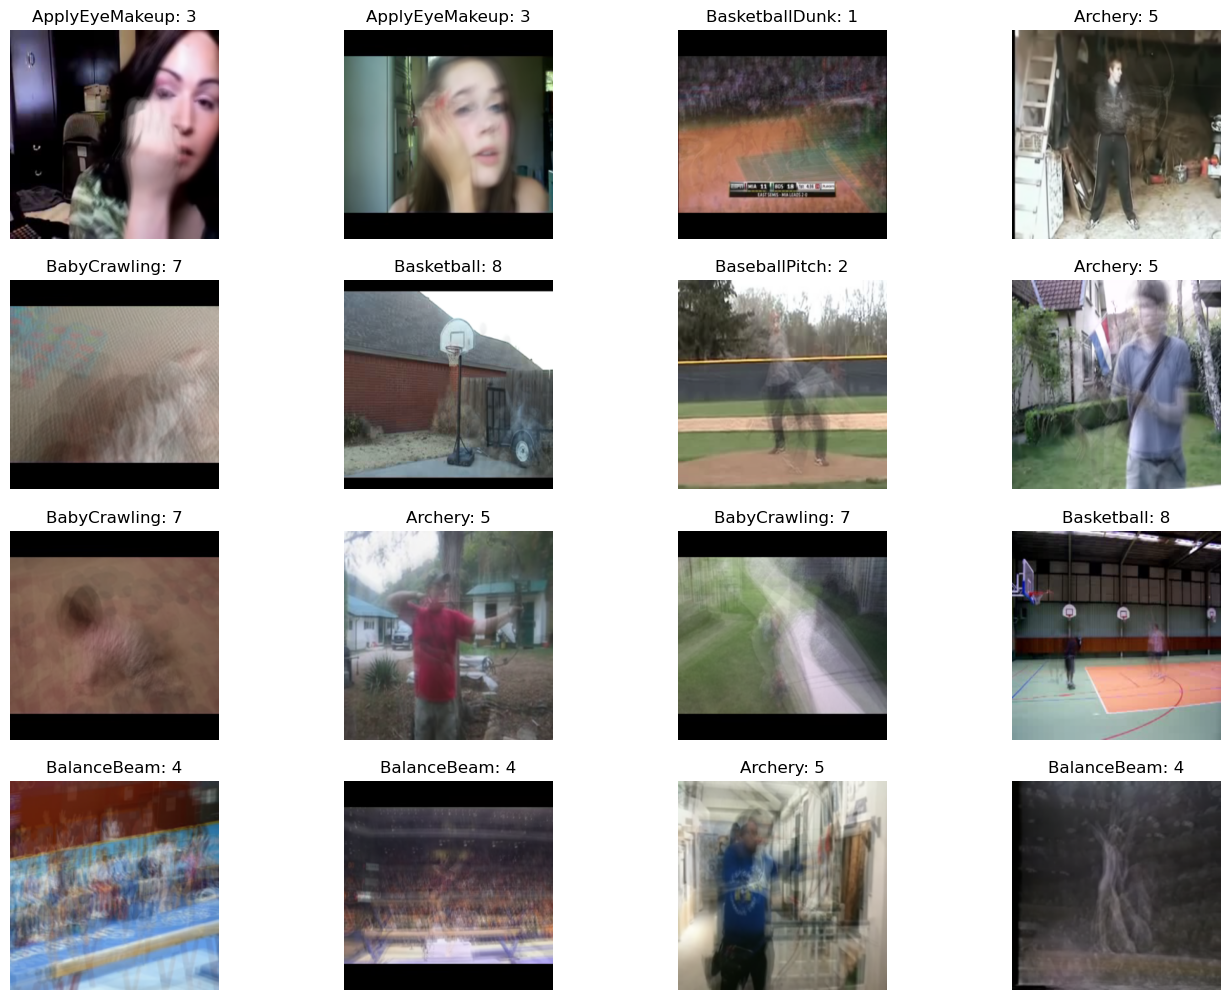

In [10]:
dim = 4 

f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [12]:
def edge_and_cut(img):
    try:
        edges = cv2.Canny(img, img_w, img_h)            
        
        if(np.count_nonzero(edges)>edges.size/10000):           
            pts = np.argwhere(edges>0)
            y1,x1 = pts.min(axis=0)
            y2,x2 = pts.max(axis=0)
            
            new_img = img[y1:y2, x1:x2]           # crop the region
            new_img = cv2.resize(new_img,(img_w, img_h))  # Convert back
        else:
            new_img = cv2.resize(img,(img_w, img_h))
    
    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))
    
    return new_img

In [13]:
def show_cropped(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, img_w, img_h)
    
    if(np.count_nonzero(edges)>edges.size/10000):
        pts = np.argwhere(edges>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)

        new_img = img[y1:y2, x1:x2]  

        edge_size = 1 #replace it with bigger size for larger images            

        emb_img[y1-edge_size:y1+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y2-edge_size:y2+edge_size, x1:x2] = [255, 0, 0]
        emb_img[y1:y2, x1-edge_size:x1+edge_size] = [255, 0, 0]
        emb_img[y1:y2, x2-edge_size:x2+edge_size] = [255, 0, 0]

        new_img = cv2.resize(new_img,(img_w, img_h))  # Convert to primary size  
        
    else:
        new_img = cv2.resize(img,(img_w, img_h))
    
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=14)
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=14)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=14)       
    ax[3].imshow(new_img, cmap='gray')
    ax[3].set_title('Cropped', fontsize=14)   

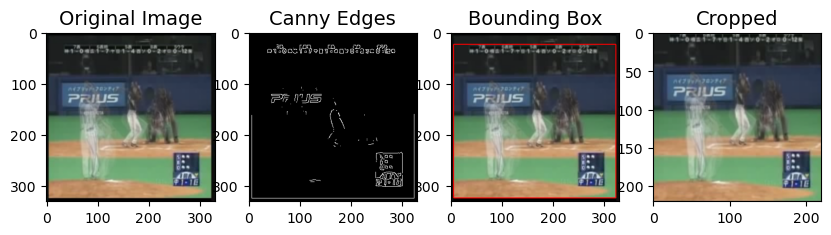

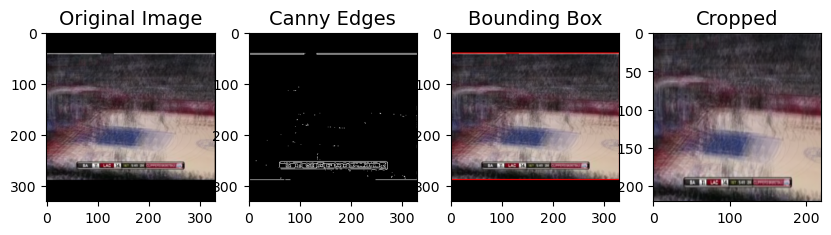

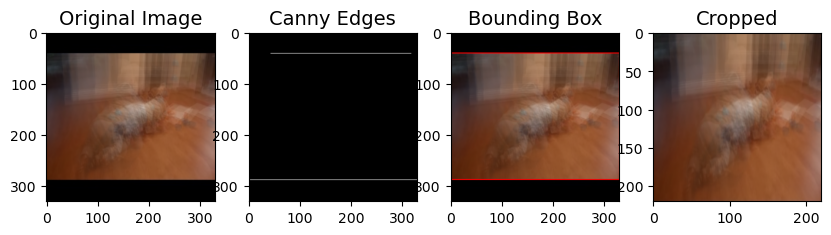

In [14]:
for x in range(0,3):
    show_cropped(Train_Imgs[randint(0,len(Train_Imgs))])

In [15]:
def crop_images(Imgs):
    CroppedImages = np.ndarray(shape=(len(Imgs), img_w, img_h, 3), dtype=np.int)

    ind = 0
    for im in Imgs: 
        x = edge_and_cut(im)
        CroppedImages[ind] = x
        ind += 1

    return CroppedImages

In [16]:
Train_Imgs = crop_images(Train_Imgs)
print('Final shape of images in train set: {} '.format(Train_Imgs.shape))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (827, 220, 220, 3), y_train: (827,) 
Shape of X_val: (207, 220, 220, 3), y_val: (207,) 


In [58]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
# print(devices)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

In [21]:
filters = 32      # the dimensionality of the output space
kernel_size = 3   # length of the 2D convolution window
max_pool = 2      # size of the max pooling windows

In [63]:
EPOCHS = 15                              # while testing you can change it
batch_size = 32                              # number of training samples using in each mini batch during GD (gradient descent) 
iter_per_epoch = len(X_train) // batch_size  # each sample will be passed [iter_per_epoch] times during training
val_per_epoch = len(X_val) // batch_size     # each sample will be passed [val_per_epoch] times during validation

Architect of model


|   |       Layers       |
|:-:|:------------------:|
| 1 |  Conv2D 32 -> Pool |
| 2 |  Conv2D 64 -> Pool |
| 3 | Conv2D 128 -> Pool |
| 4 | Conv2D 128 -> Pool |
| 5 | Conv2D 128 -> Pool |
| 6 |        FLAT        |
| 7 |        Drop        |
| 8 |      Dense 512     |
| 9 | Dense len(CLASSES) |


1. ADD 5 'blocks': 
   *  Conv2D with hypermarameters mantioned above: `Conv2D(kernel_size, (filters, filters), input_shape=(img_w, img_h, 3))` with activation function for each layer as a Rectified Linear Unit (ReLU): `Activation('relu')`  
   * MaxPooling2D layer to reduce the spatial size of the incoming features; 2D input space: `MaxPooling2D(pool_size=(max_pool, max_pool))`  
   * Do the same increading the kernel size: 32 -> 64 -> 128 -> 128 -> 128

2. Flatten the input: transform the multidimensional vector into a single dimensional vector: `Flatten()`
3. Add dropout layer which randomly sets a certain fraction of its input to 0 and helps to reduce overfitting: `Dropout(0.5)`
5. Add fully connected layer with 512 nodes and activation function relu: `Dense(512), Activation('relu')`
6. Provide last fully connected layer which specifies the number of classes . `Softmax` activation function outputs a vector that represents the probability distributions of a list of potential outcomes: `Dense(activation='softmax')`   


* Print the summary of the model.

In [59]:
model = Sequential()

# first layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(img_w, img_h, 3))) # 32
model.add(MaxPooling2D((max_pool, max_pool))) #reduce the spatial size of incoming features

# second layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 64
model.add(MaxPooling2D((max_pool, max_pool))) 

# third layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

# fourth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fifth layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same')) # 128
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))                                             # 512
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 128)     

In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()               

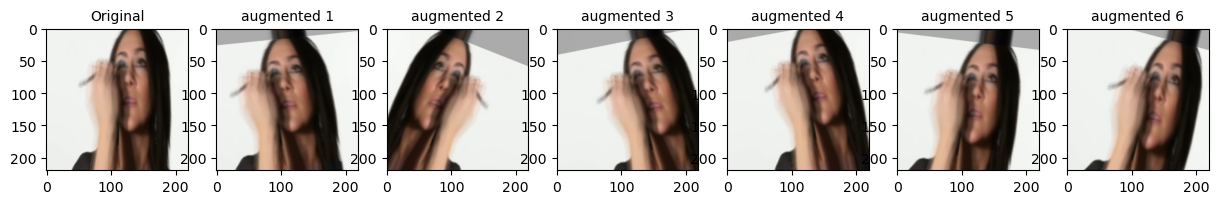

In [62]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [64]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [65]:
m = model.fit_generator(
       train_gen,
       steps_per_epoch= iter_per_epoch,
       epochs=EPOCHS, 
       validation_data = val_gen,
       validation_steps = val_per_epoch,
       verbose = 1 
       )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
25/25 [==============================] - 58s 2s/step - loss: 5.6569 - accuracy: 0.1635 - val_loss: 2.0801 - val_accuracy: 0.1875
Epoch 2/15
25/25 [==============================] - 55s 2s/step - loss: 1.9455 - accuracy: 0.2616 - val_loss: 1.7588 - val_accuracy: 0.3438
Epoch 3/15
25/25 [==============================] - 56s 2s/step - loss: 1.7190 - accuracy: 0.3774 - val_loss: 1.6062 - val_accuracy: 0.4010
Epoch 4/15
25/25 [==============================] - 56s 2s/step - loss: 1.5815 - accuracy: 0.4050 - val_loss: 1.3763 - val_accuracy: 0.4948
Epoch 5/15
25/25 [==============================] - 56s 2s/step - loss: 1.5026 - accuracy: 0.4491 - val_loss: 1.2517 - val_accuracy: 0.5833
Epoch 6/15
25/25 [==============================] - 55s 2s/step - loss: 1.4725 - accuracy: 0.4843 - val_loss: 1.2236 - val_accuracy: 0.5885
Epoch 7/15
25/25 [==============================] - 55s 2s/step - loss: 1.3216 - accuracy: 0.5094 - val_loss: 1.1707 - val_accuracy: 0.6042
Epoch 8/15
25/25 [==

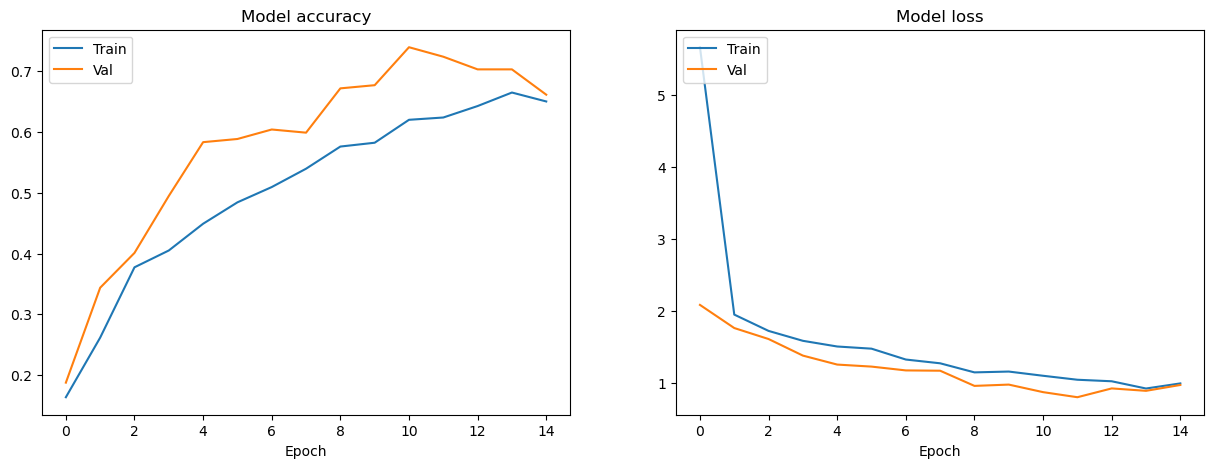

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [67]:
score = model.evaluate_generator(val_gen, steps= len(val_gen))

for idx, metric in enumerate(model.metrics_names):
    print('{}:{}'.format(metric, score[idx]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


loss:0.9457516670227051
accuracy:0.6714975833892822


7/7 [==============================] - 4s 489ms/step


<AxesSubplot:>

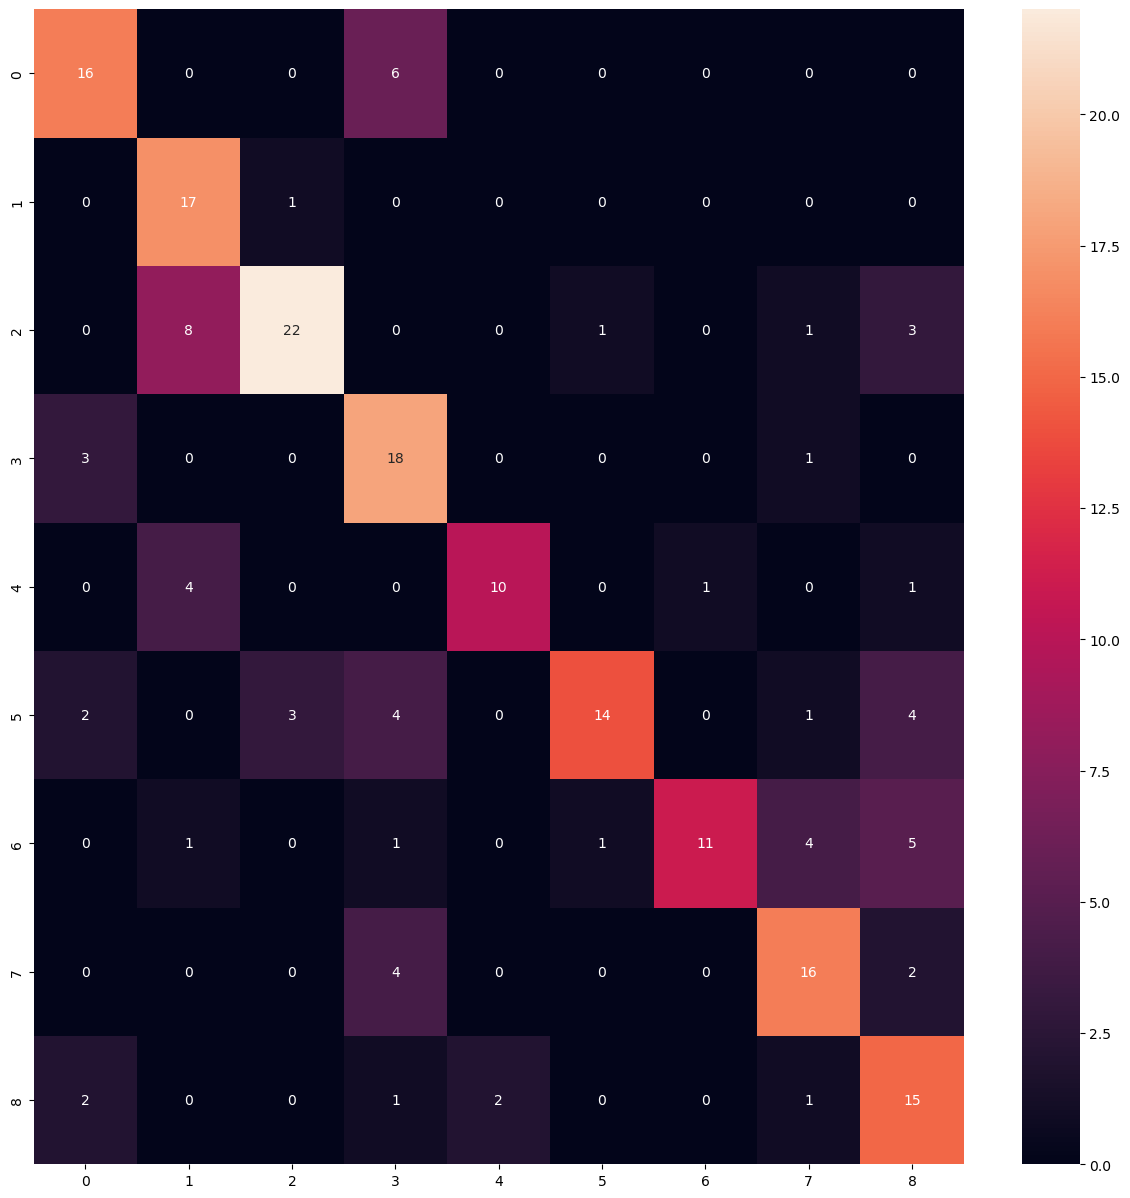

In [68]:
from sklearn.metrics import confusion_matrix
y_pre_test=model.predict(X_val)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

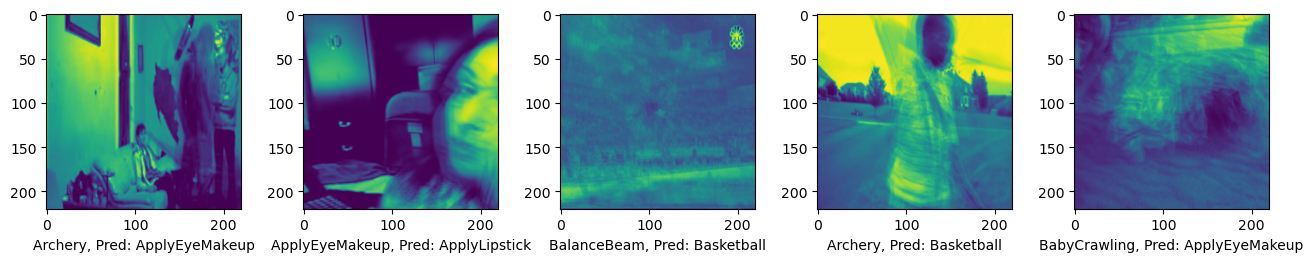

In [69]:
x=(y_pre_test-y_val!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

fig,ax=plt.subplots(1,5,sharey=False,figsize=(13,13))
fig.tight_layout()

for i in range(5):
    ax[i].imshow(X_val[x[i]][:,:,1])
    ax[i].set_xlabel('{}, Pred: {}'.format(CLASSES[y_val[x[i]]],CLASSES[y_pre_test[x[i]]]))

In [70]:
model.save('activity_recognition.h5')

In [71]:
test_dir = '/kaggle/input/dynamicimages9/test/'

In [72]:
Test_Imgs, Test_Lbls = read_imgs_lbls(test_dir)
Test_Lbls = get_class_index(Test_Lbls)

In [73]:
print(Test_Lbls)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]


In [74]:
Test_Imgs = crop_images(Test_Imgs)
print('shape of images in test set: {} '.format(Test_Imgs.shape))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

shape of images in test set: (180, 220, 220, 3) 


In [75]:
print(Test_Imgs[0])

[[[253 250 254]
  [253 250 254]
  [253 250 254]
  ...
  [113 116  97]
  [ 92  95  74]
  [ 78  81  63]]

 [[253 250 254]
  [253 250 254]
  [252 250 254]
  ...
  [112 115  95]
  [ 90  93  73]
  [ 79  81  63]]

 [[253 250 254]
  [253 250 254]
  [252 250 254]
  ...
  [108 111  92]
  [ 87  89  71]
  [ 80  83  64]]

 ...

 [[ 32  73  90]
  [ 26  68  84]
  [ 37  78  94]
  ...
  [ 51  89 120]
  [ 35  54  68]
  [ 47  57  62]]

 [[ 29  72  89]
  [ 34  76  93]
  [ 54  96 113]
  ...
  [ 50  86 116]
  [ 44  63  74]
  [ 49  59  63]]

 [[ 16  59  81]
  [ 27  69  91]
  [ 55  97 118]
  ...
  [ 59  90 117]
  [ 58  77  84]
  [ 55  65  67]]]


In [76]:
predict_x=model.predict(Test_Imgs) 
classes_x=np.argmax(predict_x,axis=1)

6/6 [==============================] - 3s 509ms/step


In [77]:
print(len(classes_x))
print(classes_x)

180
[0 0 0 0 3 0 3 0 3 3 3 3 0 0 0 0 0 3 0 0 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 1 2 2 5 8 1 2 2 2 8 1 2 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 3 3 3 3 3 0 6 4 4 4 4 7 4 4 4 4 8 4 4 4 4 4 7 4 4 4 5 0 7 5 3 7 0 5 8 8 5
 3 5 5 5 5 5 5 5 7 1 6 8 1 6 6 8 6 6 6 6 8 6 7 4 6 6 8 6 8 7 7 7 7 7 3 7 7
 7 7 7 3 7 7 7 7 3 7 3 8 8 8 8 8 8 3 8 7 7 1 8 6 7 8 0 8 0 8 8 8]


In [78]:
match = 0
for i in range(180):
    if classes_x[i] == Test_Lbls[i]:
        match=match+1
accuracy = (match/180)*100
print("Accuracy : ", accuracy)

Accuracy :  71.66666666666667


<AxesSubplot:>

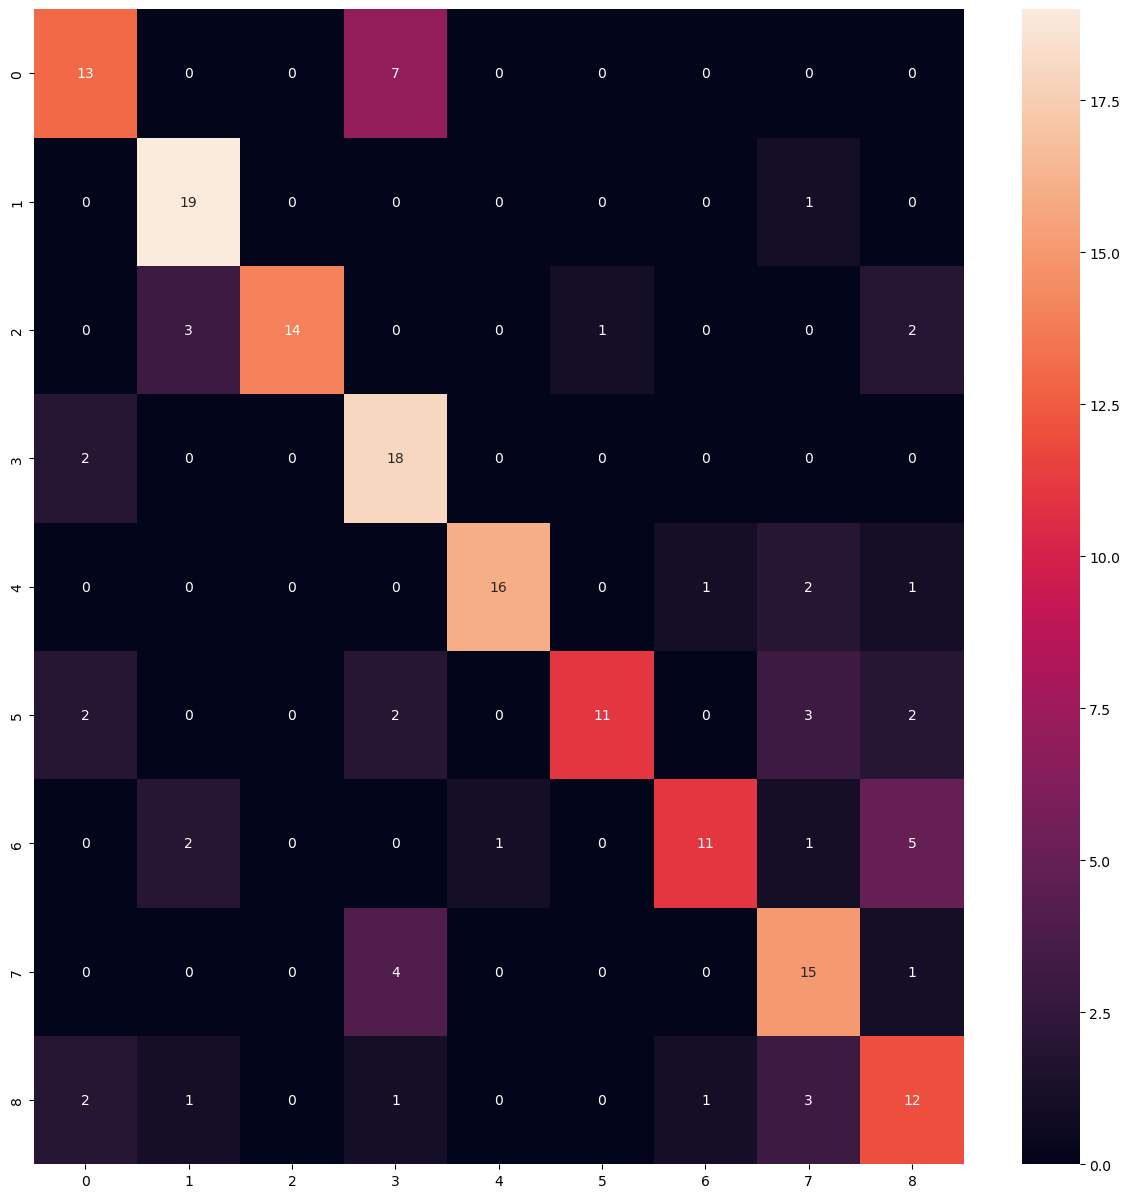

In [80]:
cm=confusion_matrix(Test_Lbls,classes_x)

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

1/1 [==============================] - 0s 47ms/step


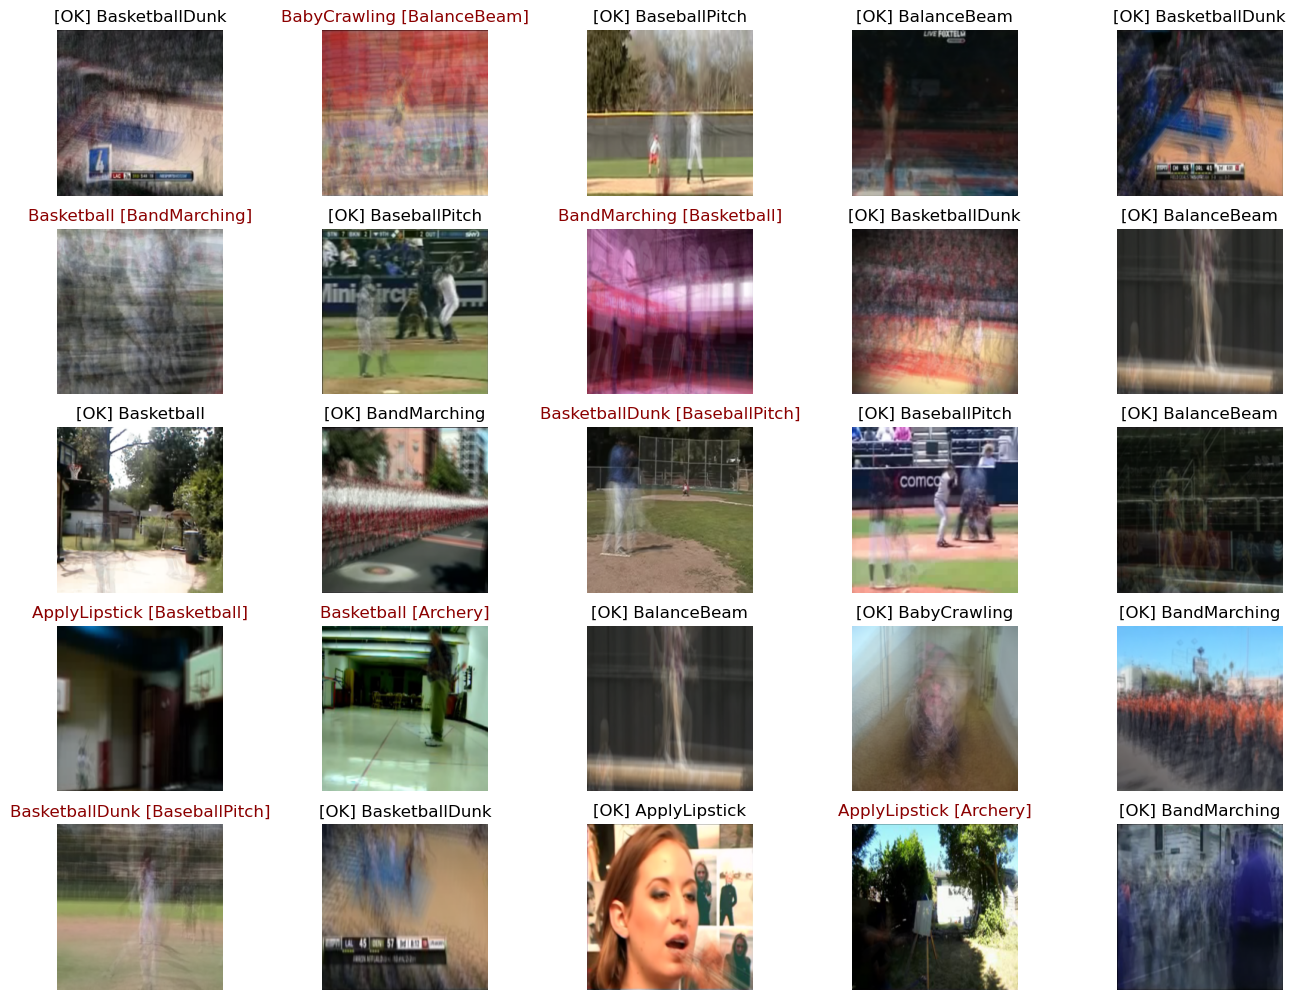

In [82]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Test_Imgs))
        pred_image = np.array([Test_Imgs[rnd_number]])
        predict_x = model.predict(pred_image)[0]
        pred_class=np.argmax(predict_x)
        pred_prob = model.predict(pred_image).reshape(9)
        act = CLASSES[Test_Lbls[rnd_number]]
        ax[i,j].imshow(Test_Imgs[rnd_number])
        ax[i,j].imshow(pred_image[0])
        if(CLASSES[pred_class] != CLASSES[Test_Lbls[rnd_number]]):
            t = '{} [{}]'.format(CLASSES[pred_class], CLASSES[Test_Lbls[rnd_number]])
            ax[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '[OK] {}'.format(CLASSES[pred_class]) 
            ax[i,j].set_title(t)
        ax[i,j].axis('off')

# Conclusion

